In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.138, ECE: 0.018
Optimal temperature: 1.122
After temperature - NLL: 1.147, ECE: 0.036


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7981 ± 0.0016
Final Average Prediction Set Size: 6.20 ± 0.11
Final Average Coverage: 0.8006 ± 0.0038
Final Average Real Probability: 0.6916 ± 0.0039


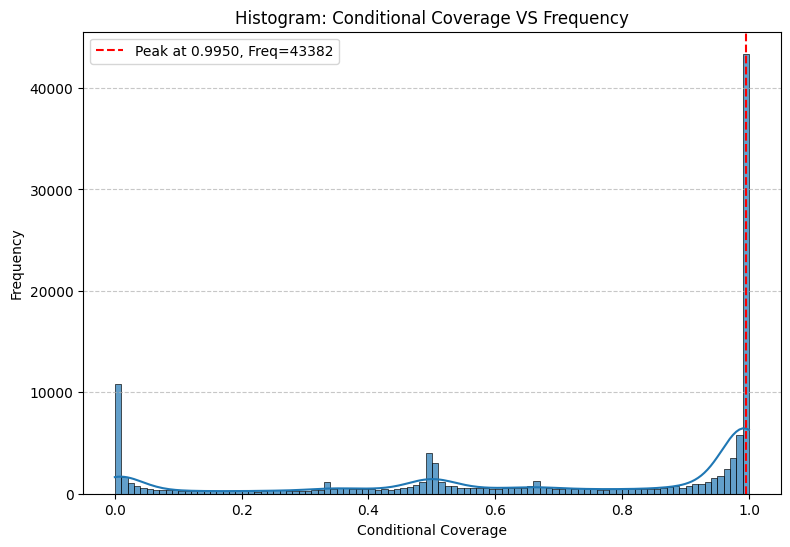

43382 (34.88%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8078 ± 0.0017
Final Average Prediction Set Size: 3.74 ± 0.03
Final Average Coverage: 0.8006 ± 0.0037
Final Average Real Probability: 0.6811 ± 0.0036


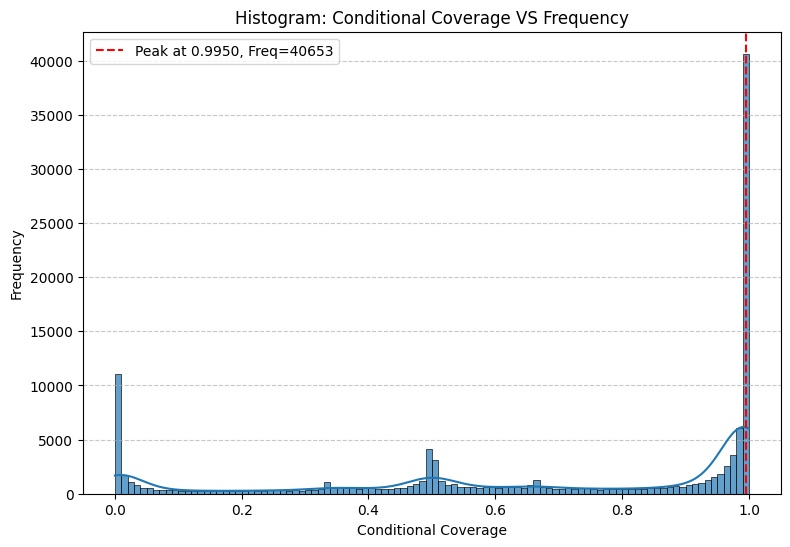

40653 (32.69%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.01, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8025 ± 0.0035
Final Average Prediction Set Size: 2.47 ± 0.02
Final Average Coverage: 0.8000 ± 0.0041
Final Average Real Probability: 0.6799 ± 0.0028


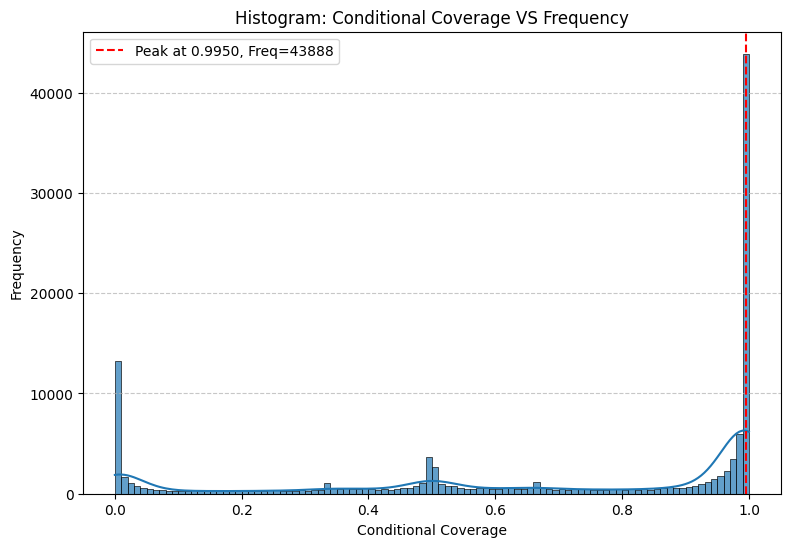

43888 (35.29%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7945 ± 0.0020
Final Average Prediction Set Size: 6.34 ± 0.14
Final Average Coverage: 0.8004 ± 0.0045
Final Average Real Probability: 0.6940 ± 0.0043


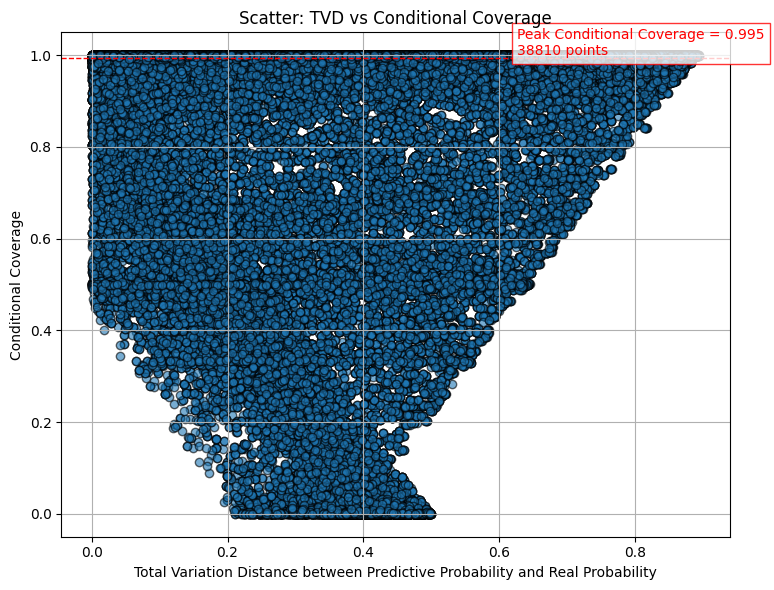

Peak Conditional Coverage = 0.995, with 38810 samples

=== Count Regions Summary ===
37450 (30.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
26272 (21.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
53327 (42.9%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83375']
  Real Probability Set      : ['0.98364']
Sample 2:
  Predictive Probability Set: ['0.98596']
  Real Probability Set      : ['0.98018']
Sample 3:
  Predictive Probability Set: ['0.97121']
  Real Probability Set      : ['0.99966']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.44374', '0.25488', '0.07907']
  Real Probability Set      : ['0.10333', '0.00384', '0.05294']
Sample 2:
  Predictive Probability Set: ['0.70963']
  Real Probability Set      : ['0.00042']
Sample 3:
  Predictive Probability Set: ['0.67909', '0.10585']
  Real Probability Set      

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8044 ± 0.0016
Final Average Prediction Set Size: 3.80 ± 0.03
Final Average Coverage: 0.8002 ± 0.0035
Final Average Real Probability: 0.6826 ± 0.0035


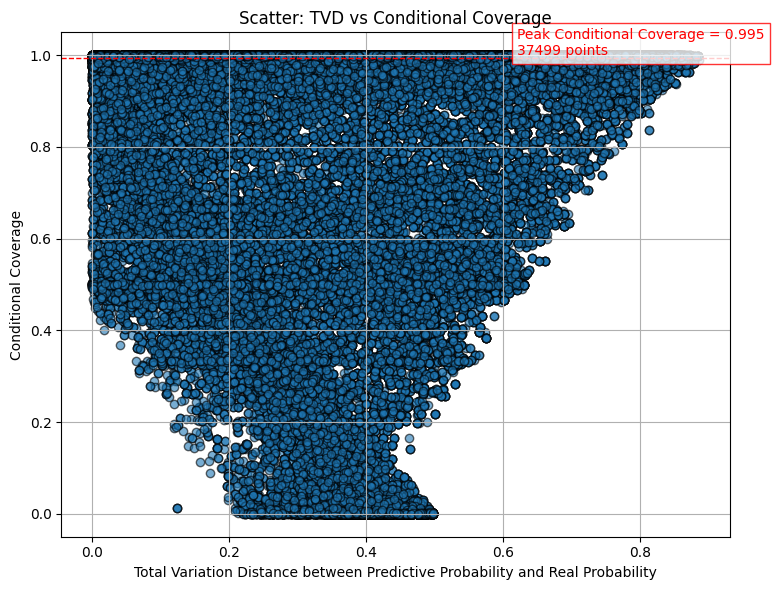

Peak Conditional Coverage = 0.995, with 37499 samples

=== Count Regions Summary ===
38291 (30.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24584 (19.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
55810 (44.9%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77250']
  Real Probability Set      : ['0.85972']
Sample 2:
  Predictive Probability Set: ['0.93545']
  Real Probability Set      : ['0.99617']
Sample 3:
  Predictive Probability Set: ['0.98985']
  Real Probability Set      : ['0.99614']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.91039']
  Real Probability Set      : ['0.00571']
Sample 2:
  Predictive Probability Set: ['0.75640']
  Real Probability Set      : ['0.04123']
Sample 3:
  Predictive Probability Set: ['0.57994', '0.14364', '0.09497']
  Real Probability Set      : ['0.02323', '0.00042', '0.00052

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.01, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7988 ± 0.0037
Final Average Prediction Set Size: 2.48 ± 0.02
Final Average Coverage: 0.7994 ± 0.0044
Final Average Real Probability: 0.6815 ± 0.0033


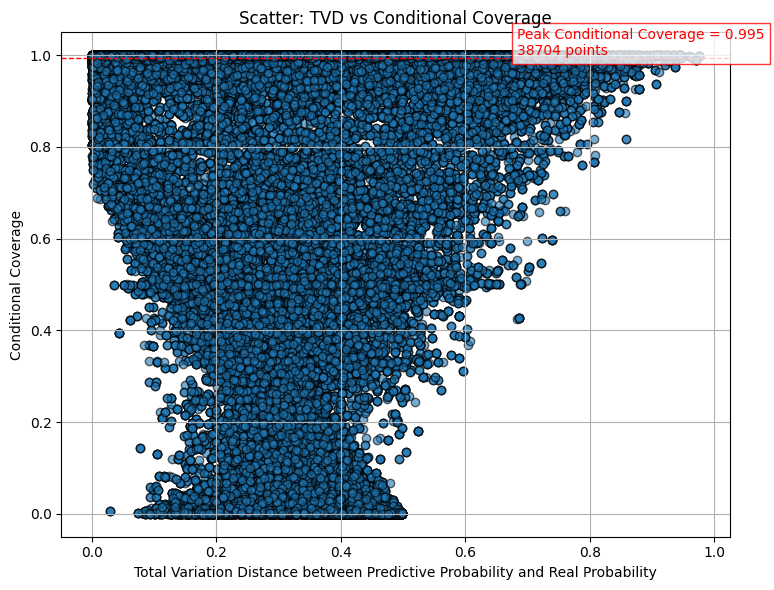

Peak Conditional Coverage = 0.995, with 38704 samples

=== Count Regions Summary ===
41538 (33.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21635 (17.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
53980 (43.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.90971']
  Real Probability Set      : ['0.99972']
Sample 2:
  Predictive Probability Set: ['0.99547']
  Real Probability Set      : ['0.96118']
Sample 3:
  Predictive Probability Set: ['0.91763']
  Real Probability Set      : ['0.97726']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.30991', '0.07771', '0.07479', '0.05865', '0.05220', '0.03848']
  Real Probability Set      : ['0.00224', '0.00224', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.97554']
  Real Probability Set      : ['0.00342']
Sample 3:
  Predictive Pr

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)